In [1]:
import sys # for python library version
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library

In [2]:
print('Python: {}'.format(sys.version))  # Python version
print('numpy: {}'.format(np.__version__))  # Numpy version
print('pandas: {}'.format(pd.__version__))  # Pandas version
print('matplotlib: {}'.format(matplotlib.__version__))  # Matplotlib version
print('seaborn: {}'.format(sns.__version__))  # seaborn version
print('sklearn: {}'.format(sklearn.__version__))  # sklearn version

Python: 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
numpy: 1.15.1
pandas: 0.23.4
matplotlib: 2.2.3
seaborn: 0.9.0
sklearn: 0.21.dev0


In [3]:
# No warning of any kind please!
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

In [4]:
# importing the dataset to a variable
data = pd.read_csv("../input/covtype.csv")

# displaying first 3 observations
data.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [5]:
# since the data doesn't have column names, we will provide it in a form of list
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

# Feeding column names to the data
data.columns = feature_names

In [6]:
# displaying first 5 observation
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [7]:
# dimensions of the data
# where x will be no. of observation
# and y will be features including 1 target variable
x, y = data.shape

print('We have ', x, ' number of observations and ', y-1, ' features for this dataset to predict type of forest cover.')  # removing count of a target variable in 'y'

We have  581012  number of observations and  54  features for this dataset to predict type of forest cover.


In [8]:
# datatypes of features
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

Our dataset has 54 features and 1 target variable 'Cover_Type'. From 54 features, 10 are numeric and 44 are categorical. From 44 categorical, 40 are of Soil_Type and 4 of Wilderness_Area.

The target variable Cover_Type ranges bewtween integer value 1 - 7 and each number is a key reprsenting names of different forest type. Let's look at what number represents which forest cover types.

Key	Name
1	Spruce / Fir
2	Lodgepole Pine
3	Ponderosa Pine
4	Cottonwood / Willow
5	Aspen
6	Douglas-fir
7	Krummholz

In [9]:
 #Extracting all numerical features from data
num_fea = data.iloc[:, :10]

# extracting all binary features from data
binary_fea = data.iloc[:, 10:-1]


# statistics of numerical features
num_fea.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [10]:
# statistics of binary or categorical features
binary_fea.describe()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# skew distribution
data.skew()

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

In [12]:
# grouping by forest cover type and calculating total occurance
data.groupby('Cover_Type').size()

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

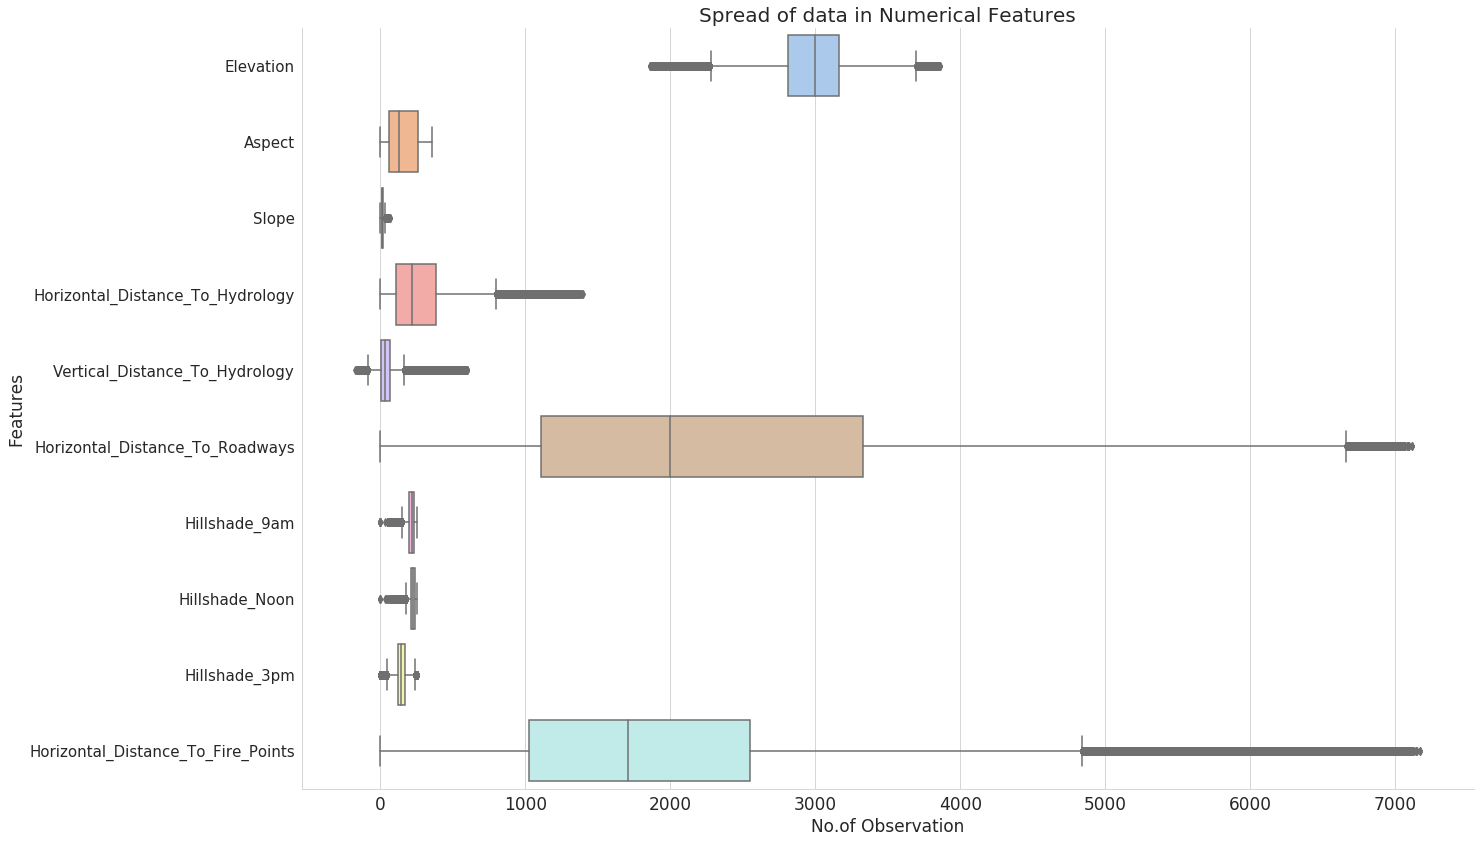

In [13]:
# importing pyplot module from matplotlib to plt
plt = matplotlib.pyplot

# plot bg
sns.set_style("whitegrid")

#Size of the plot
plt.subplots(figsize=(21, 14))

# setting color of the plot
color = sns.color_palette('pastel')

# Using seaborn to plot it horizontally with 'color'
sns.boxplot(data = num_fea, orient='h', palette=color)

# Uncomment below code to visualize where every single data observation of the features lie in the plot 
#sns.swarmplot(data = num_fea)  #WARNING THIS WILL TAKE LOTS OF TIME DEPENDING ON CPU POWER AND RAM YOU HAVE  !!

# Title of the graph
plt.title('Spread of data in Numerical Features', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

# x-axis label size
plt.xticks(size = 17)
#y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

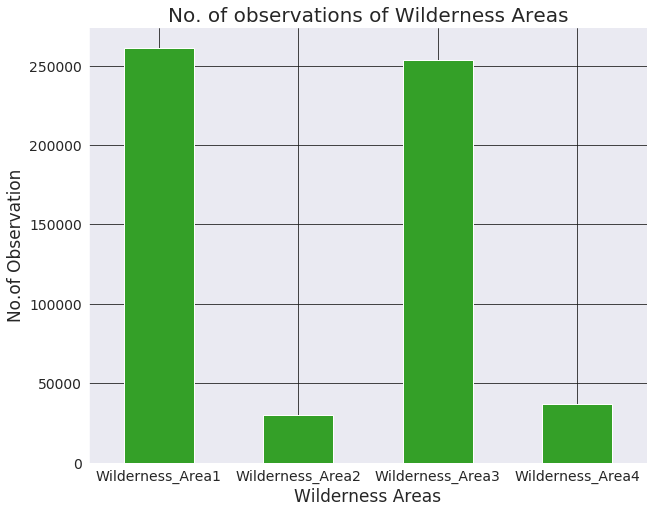

In [14]:
# Splitting binary_fea data in 2
# Wild_data will have wilderness data
# Soil_Data will have Soil data

# Splitting
Wild_data, Soil_data = binary_fea.iloc[:,:4], binary_fea.iloc[:,4:]

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# list of colors
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]
# using seaborn, passing color to palette
color = sns.color_palette(flatui)

# Sum the data, plot bar with given size using color defined
Wild_data.sum().plot(kind='bar', figsize=(10, 8), color='#34a028')

# Title of the graph
plt.title('No. of observations of Wilderness Areas', size = 20)

# Horizontal axis Label
plt.xlabel('Wilderness Areas', size = 17)
# Vertical axis Label
plt.ylabel('No.of Observation', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 14)
# y-axis label size
plt.yticks(size = 14)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

In [15]:
# Statistical description of Highest observation of Soil Type seen
Soil_data.loc[:,'Soil_Type29'].describe()

count    581012.000000
mean          0.198356
std           0.398762
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Soil_Type29, dtype: float64

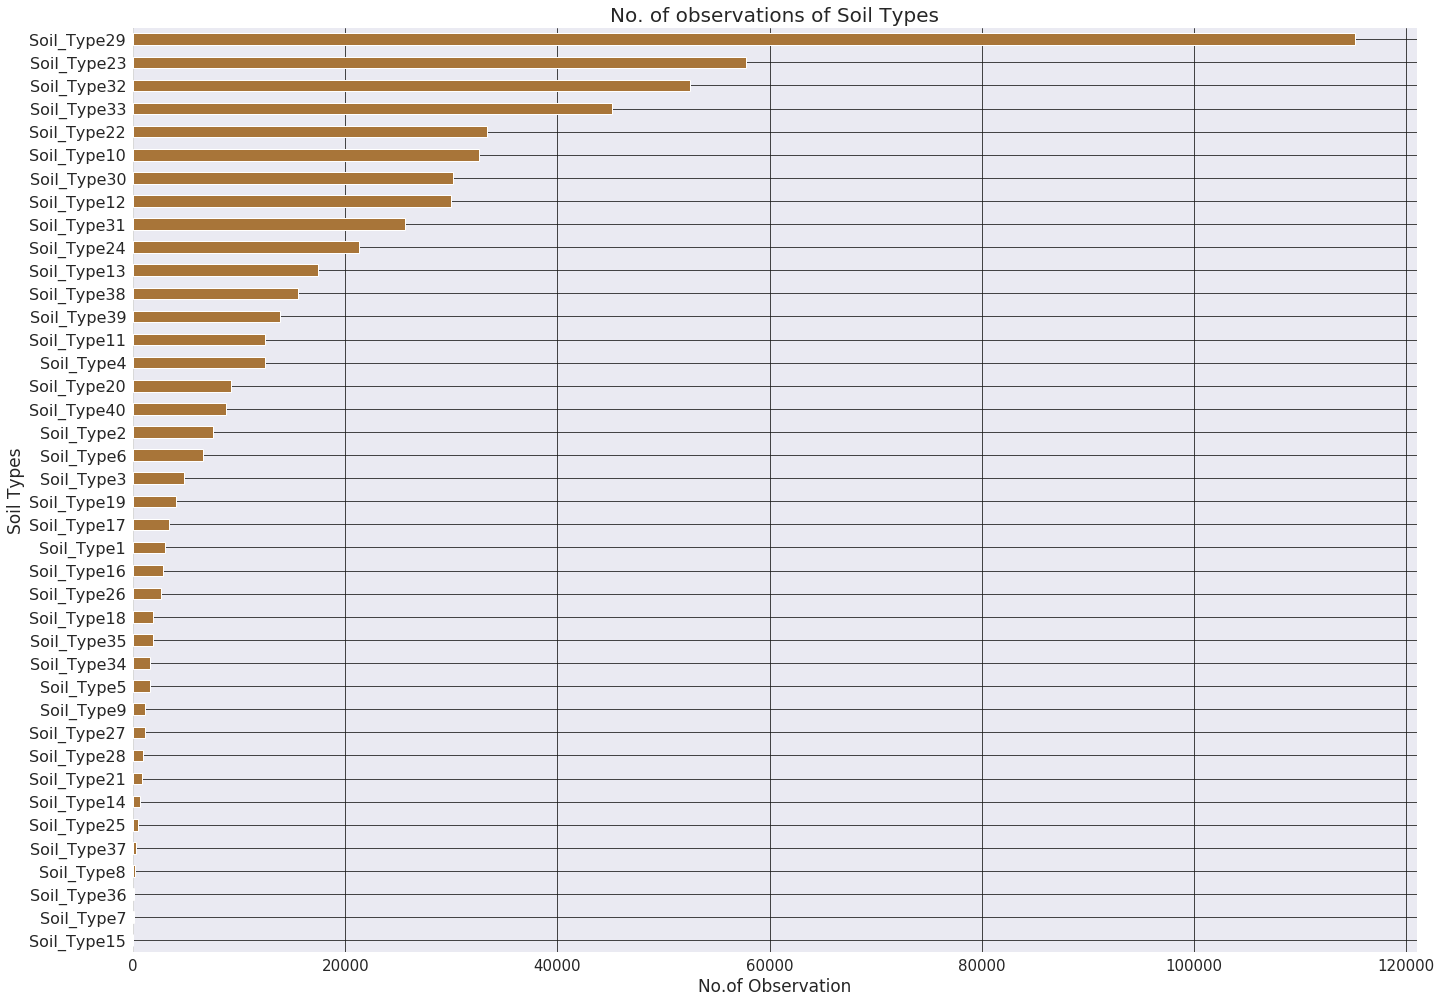

In [16]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# sum Soil data values, and pass it as a series 
soil_sum = pd.Series(Soil_data.sum())

# will sort values in descending order
soil_sum.sort_values(ascending = False, inplace = True)

# plot horizontal bar with given size using color defined
soil_sum.plot(kind='barh', figsize=(23, 17), color= '#a87539')

# horizontal bar flips columns in ascending order, this will filp it back in descending order
plt.gca().invert_yaxis()

# Title of the graph
plt.title('No. of observations of Soil Types', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Soil Types', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 15)
# y-axis label size
plt.yticks(size = 16)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

In [17]:
# Exact counts of observations of Soil Type
soil_sum

Soil_Type29    115247
Soil_Type23     57752
Soil_Type32     52519
Soil_Type33     45154
Soil_Type22     33373
Soil_Type10     32634
Soil_Type30     30170
Soil_Type12     29971
Soil_Type31     25666
Soil_Type24     21278
Soil_Type13     17431
Soil_Type38     15573
Soil_Type39     13806
Soil_Type11     12410
Soil_Type4      12396
Soil_Type20      9259
Soil_Type40      8750
Soil_Type2       7525
Soil_Type6       6575
Soil_Type3       4823
Soil_Type19      4021
Soil_Type17      3422
Soil_Type1       3031
Soil_Type16      2845
Soil_Type26      2589
Soil_Type18      1899
Soil_Type35      1891
Soil_Type34      1611
Soil_Type5       1597
Soil_Type9       1147
Soil_Type27      1086
Soil_Type28       946
Soil_Type21       838
Soil_Type14       599
Soil_Type25       474
Soil_Type37       298
Soil_Type8        179
Soil_Type36       119
Soil_Type7        105
Soil_Type15         3
dtype: int64

In [18]:
# Count for more than 1 presence
more_count = 0
# Count for none presence
none_count = 0
# total count
total = 0

#looping through each row of wilderness area column
for index, row in Wild_data.iterrows():
    # adding the values of each column of that row
    total = row.sum(axis=0)
    
    #checking greater than 1
    if total > 1:
        # if found, increment count by 1
        more_count =+ 1
        # reset the total
        total = 0
        # do not execute code below, start from top
        break
        
    #checking for none   
    if total == 0:
        # if found, increment count by 1
        none_count =+ 1
        # reset the total
        total = 0      

# priting results found
print('We have ', more_count, ' observations that shows presence in more than 1 Wilderness Area.')
print('We have ' ,none_count, ' observations that shows no presence in any Wilderness Area.')

We have  0  observations that shows presence in more than 1 Wilderness Area.
We have  0  observations that shows no presence in any Wilderness Area.


In [19]:
# Count for more than 1 presence
more_count = 0
# Count for none presence
none_count = 0
# total count
total = 0

#looping through each row of Soil Type area column
for index, row in Soil_data.iterrows():
    # adding the values of each column of that row
    total = row.sum(axis=0)
    
    #checking greater than 1
    if total > 1:
        # if found, increment count by 1
        more_count =+ 1
        # reset the total
        total = 0
        # do not execute code below, start from top
        break
        
    #checking for none   
    if total == 0:
        # if found, increment count by 1
        none_count =+ 1
        # reset the total
        total = 0      

# priting results found
print('We have ', more_count, ' observations that shows presence in more than 1 Soil Type Area.')
print('We have ' ,none_count, ' observations that shows no presence in any Soil Type Area.')

We have  0  observations that shows presence in more than 1 Soil Type Area.
We have  0  observations that shows no presence in any Soil Type Area.


In [20]:
# will delete observation if it has any missing values in any of the features.
data.dropna()

# shape of the data after deleting missing entries
data.shape

(581012, 55)

In [21]:
# deleting duplicates, except the first observation
data.drop_duplicates(keep='first')

# shape of the data after deleting duplicate entries
data.shape

(581012, 55)

In [22]:
# importing model for feature importance
from sklearn.ensemble import ExtraTreesClassifier

# passing the model
model = ExtraTreesClassifier(random_state = 53)

# feeding all our features to var 'X'
X = data.iloc[:,:-1]
# feeding our target variable to var 'y'
y = data['Cover_Type']

# training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
ETC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ETC']).sort_values('ETC', ascending=False)

# removing traces of this model
model = None

# show top 10 features
ETC_feature_importances.head(10)

,ETC
Elevation,0.212199
Horizontal_Distance_To_Roadways,0.108988
Horizontal_Distance_To_Fire_Points,0.105661
Horizontal_Distance_To_Hydrology,0.064502
Vertical_Distance_To_Hydrology,0.058575
Aspect,0.051922
Hillshade_Noon,0.045975
Hillshade_9am,0.043275
Hillshade_3pm,0.043256
Slope,0.036324


In [23]:
sample = data[['Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Aspect','Wilderness_Area4',
            'Hillshade_Noon','Hillshade_3pm','Hillshade_9am','Slope','Soil_Type22','Soil_Type10','Soil_Type4','Soil_Type34','Soil_Type34','Wilderness_Area3','Soil_Type12',
            'Soil_Type2','Wilderness_Area1', 'Cover_Type']]

In [24]:
# importing feature scaling function
from sklearn.preprocessing import MinMaxScaler

# passing range to the function and then save it
scaler = MinMaxScaler(feature_range = (0,1))

# feeding sample features to var 'X'
X = sample.iloc[:,:-1]

# feeding our target variable to var 'y'
y = sample['Cover_Type']

# apply feature scaling to all features
X_scaled = scaler.fit_transform(X)
#s_sample_2 = scaler.fit_transform(X2)

In [25]:
# our data after feature scaling
X_scaled

array([[0.36868434, 0.07165941, 0.87536596, ..., 0.        , 0.        ,
        1.        ],
       [0.36568284, 0.05479837, 0.86783772, ..., 0.        , 0.        ,
        1.        ],
       [0.47273637, 0.44681748, 0.85333891, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.26363182, 0.01264578, 0.11905758, ..., 0.        , 1.        ,
        0.        ],
       [0.26263132, 0.01264578, 0.12045169, ..., 0.        , 1.        ,
        0.        ],
       [0.26213107, 0.00941408, 0.12198522, ..., 0.        , 1.        ,
        0.        ]])

In [26]:
# importing train-test function
from sklearn.model_selection import train_test_split

# split the data in 75%-25% train-test respectively with fixed state
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 53)

In [27]:
# number of training observation
print(X_train.shape, X_test.shape)

(435759, 20) (145253, 20)


In [28]:
# to measure performance
from sklearn.model_selection import cross_val_score

# for calculating time elapsed
import time

# fucntion
def model_evaluation(clf):
    
    # passing classifier to a variable
    clf = clf
    
    # records time
    t_start = time.time()
    # classifier learning the model
    clf = clf.fit(X_train, y_train)
    # records time
    t_end = time.time()
    
    
    # records time
    c_start = time.time()     
    # Using 10 K-Fold CV on data, gives peroformance measures
    accuracy  = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    f1_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1_macro')
    # records the time
    c_end = time.time()    
    
    
    # calculating mean of all 10 observation's accuracy and f1, taking percent and rounding to two decimal places
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    # substracts end time with start to give actual time taken in seconds
    # divides by 60 to convert in minutes and rounds the answer to three decimal places
    # time in training
    t_time = np.round((t_end - t_start) / 60, 3)
    # time for evaluating scores
    c_time = np.round((c_end - c_start) / 60, 3)
    
    
    # Removing traces of classifier
    clf = None
    
    
    # returns performance measure and time of the classifier 
    print("The accuracy score of this classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train and", c_time,
          "minutes to evaluate cross validation and metric scores.")

In [30]:
# importing Stochastic Gradient Descent Classifier function
from sklearn.linear_model import SGDClassifier

model_evaluation(SGDClassifier(n_jobs=-1, random_state = 53))


The accuracy score of this classifier on our training set is 69.34 % and f1 score is 30.77 % taking 0.03 minutes to train and 1.408 minutes to evaluate cross validation and metric scores.


In [ ]:
# importing Random Forest function
from sklearn.ensemble import RandomForestClassifier

model_evaluation(RandomForestClassifier(n_jobs=-1, random_state = 53))